<a href="https://colab.research.google.com/github/alvie978/Bitcoin-Studies/blob/main/Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Project Title:Bitcoin vs Stock Market: A Return, Risk, and Correlation Analysis**

Cryptocurrency has become one of the most influential financial innovations of the past decade, with Bitcoin being the most well-known and widely used digital asset. At the same time, traditional financial markets, such as the NASDAQ Index, continue to play an important role in reflecting overall economic conditions. Because of this, understanding how Bitcoin behaves compared to established stock markets is increasingly important for investors, analysts, and anyone interested in financial trends.

Bitcoin was introduced in 2008 and operates very differently from traditional currencies. Instead of relying on banks or governments, Bitcoin allows users to transfer value directly to one another through a decentralized network. Each transaction works like a digital message stating that a certain amount of Bitcoin is being sent to a specific address and is secured using a private key, similar to a digital signature. Network nodes then verify that the sender owns the Bitcoin and that the same funds are not being spent more than once.

In this project, Bitcoin is compared with the NASDAQ Index over the period from 2018 to 2024. The analysis focuses on three key aspects: returns, volatility, and correlation between assets. Using data analysis techniques and visualizations, the aim is to examine whether Bitcoin can act as a diversification tool or if it behaves more like a traditional risk-on asset. The project includes calculations of daily returns, rolling volatility, and rolling correlations, all of which are presented in an interactive dashboard to highlight market trends, risk patterns, and performance differences.


Dataset link:https://www.kaggle.com/datasets/adilbhatti/bitcoin-and-stock-exchanges/data

In [ ]:
df=pd.read_csv("Dataset.csv")
df.head()

,Date,BTC,NYSE,NASDAQ,LSE,BTC_Volume,NYSE_Volume,NASDAQ_Volume,LSE_Volume
0,2018-01-02,14982.099609,12902.719727,7006.899902,3742.0,16846600192,3397430000,1929700000,497857.0
1,2018-01-03,15201.000000,12957.280273,7065.529785,3749.0,16871900160,3544030000,2173130000,1009997.0
2,2018-01-04,15599.200195,13028.459961,7077.910156,3749.0,21783199744,3697340000,2103220000,669448.0
3,2018-01-05,17429.500000,13103.230469,7136.560059,3758.0,23840899072,3239280000,2024000000,2225274.0
4,2018-01-08,15170.099609,13114.349609,7157.390137,3744.0,18413899776,3246160000,2055010000,930995.0


In [ ]:
#Drop the duplicated rows
df.drop_duplicates(inplace=True)

In [ ]:
#Convert date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [ ]:
#Calculate Daily Returns
df['BTC_Return'] = df['BTC'].pct_change()
df['NASDAQ_Return'] = df['NASDAQ'].pct_change()
df['NYSE_Return'] = df['NYSE'].pct_change()
df['LSE_Return'] = df['LSE'].pct_change()

#print out the daily returns
print(df[['Date', 'BTC_Return', 'NASDAQ_Return', 'NYSE_Return', 'LSE_Return']])

           Date  BTC_Return  NASDAQ_Return  NYSE_Return  LSE_Return
0    2018-01-02         NaN            NaN          NaN         NaN
1    2018-01-03    0.014611       0.008367     0.004229    0.001871
2    2018-01-04    0.026196       0.001752     0.005493    0.000000
3    2018-01-05    0.117333       0.008286     0.005739    0.002401
4    2018-01-08   -0.129631       0.002919     0.000849   -0.003725
...         ...         ...            ...          ...         ...
1378 2023-06-26   -0.013824      -0.011617     0.003193   -0.000950
1379 2023-06-27    0.013777       0.016489     0.008244   -0.006656
1380 2023-06-28   -0.019614       0.002662    -0.001874    0.003829
1381 2023-06-29    0.011936      -0.000031     0.007685   -0.008343
1382 2023-06-30    0.001048       0.014464     0.008803    0.005529

[1383 rows x 5 columns]


**Return Comparison**

Simply looking at price levels does not fully capture how volatile or risky an asset is. Therefore, this analysis uses daily returns, daily log returns, and cumulative returns to better understand both performance and volatility.

Daily returns help reveal how frequently Bitcoin's price moves up or down, how large those movements are, and how they compare to more stable assets such as the NASDAQ. Daily return measures the percentage change in price from one day to the next, calculated as:

(today's price - yesterday's price) / yesterday's price


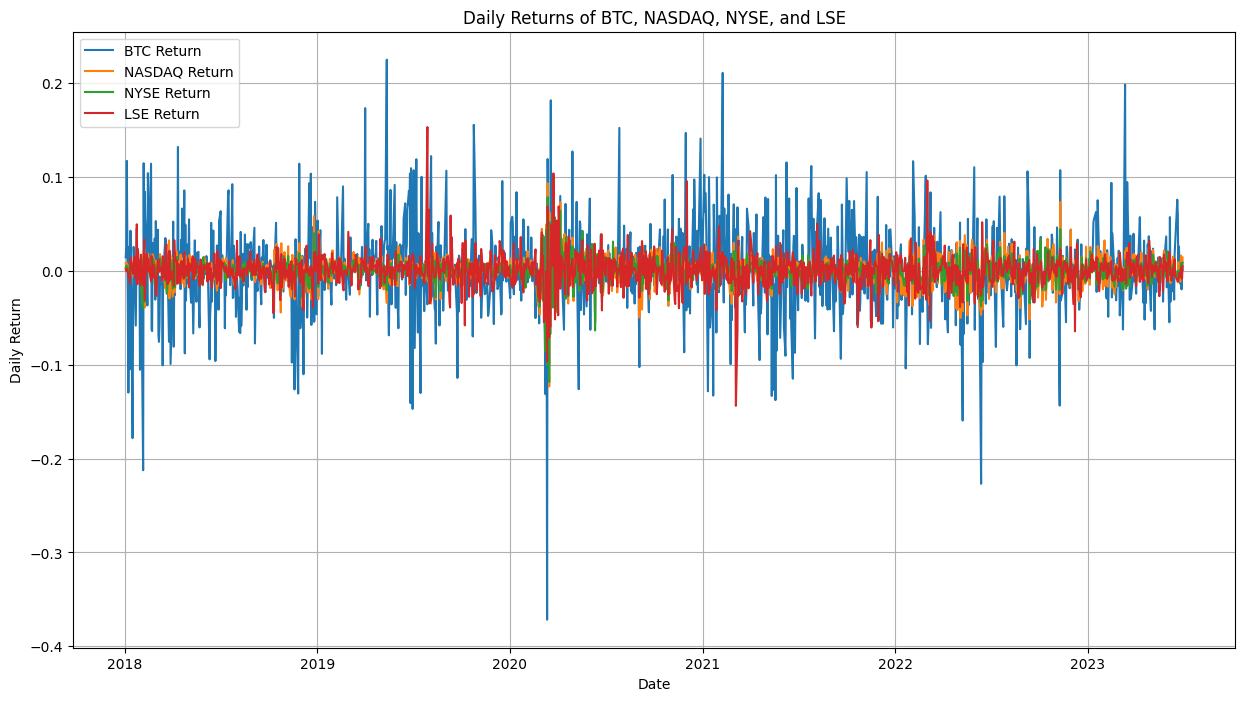

In [ ]:

#Draw graph to visualize daily returns
plt.figure(figsize=(15, 8))
plt.plot(df['Date'], df['BTC_Return'], label='BTC Return')
plt.plot(df['Date'], df['NASDAQ_Return'], label='NASDAQ Return')
plt.plot(df['Date'], df['NYSE_Return'], label='NYSE Return')
plt.plot(df['Date'], df['LSE_Return'], label='LSE Return')
plt.title('Daily Returns of BTC, NASDAQ, NYSE, and LSE')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

A negative daily return indicates a loss in value. The results show that Bitcoin experiences much larger and more frequent price fluctuations compared to traditional stock indices. The London Stock Exchange (LSE) also shows noticeable volatility starting around late 2019, followed by more stable behavior after 2022.

In [ ]:
#Ensure numerics
price_cols = ['BTC', 'NYSE', 'NASDAQ', 'LSE']
vol_cols = [c for c in df.columns if 'Volume' in c]
for c in price_cols + vol_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
#Compute Daily log returns
returns = np.log(df[price_cols] / df[price_cols].shift(1)).dropna()

**Daily log returns**

Daily log returns are a modified version of daily returns that are commonly used in financial analysis. They smooth the data, are easier to aggregate over time, and tend to follow a more normal distribution, making them useful for statistical modeling. Log returns also handle large price swings more effectively.


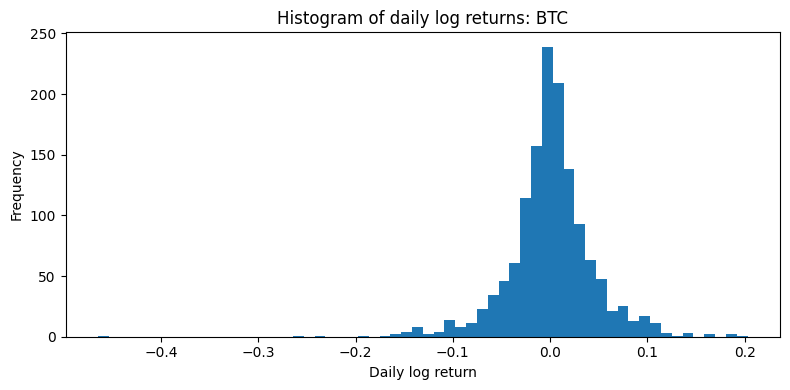

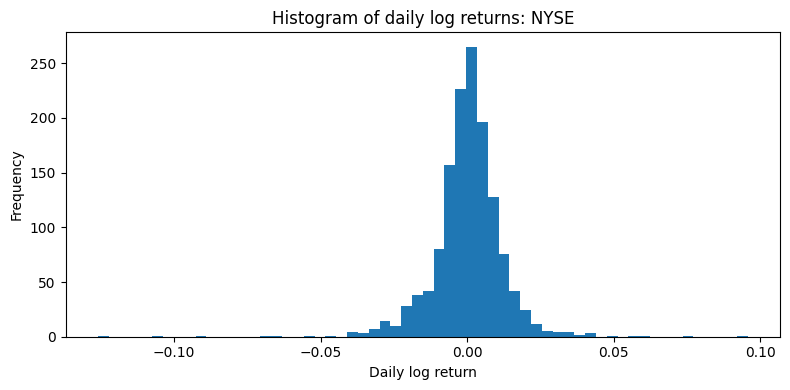

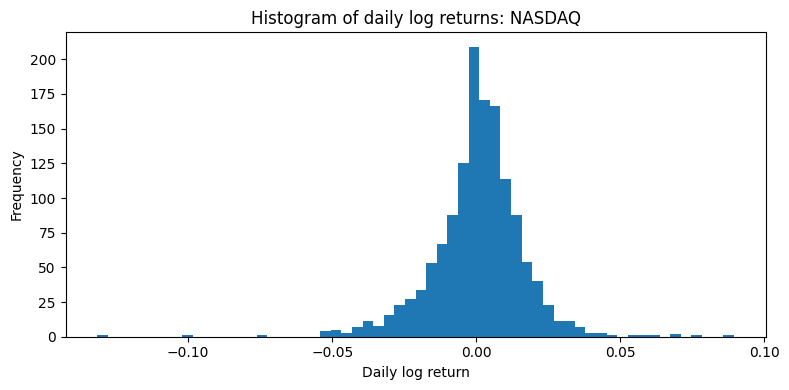

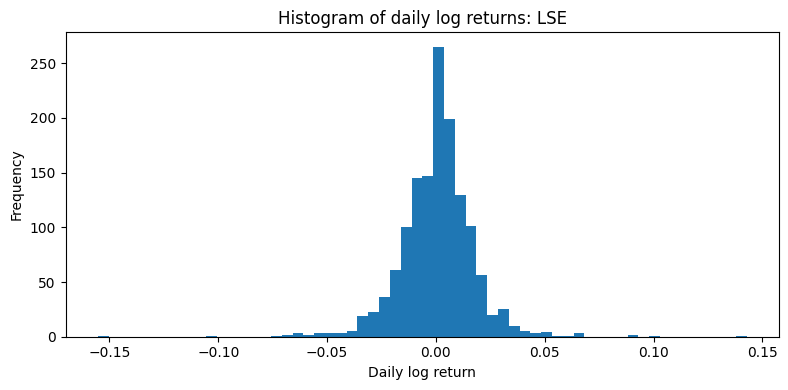

In [ ]:
#Return histograms (one-per-asset)
for col in returns.columns:
    plt.figure(figsize=(8,4))
    plt.hist(returns[col].dropna(), bins=60)
    plt.title(f"Histogram of daily log returns: {col}")
    plt.xlabel("Daily log return"); plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

When comparing the histograms of daily log returns, the spread of the distribution represents volatility. A wider distribution indicates higher risk, while longer tails suggest a higher chance of extreme price movements. Bitcoin's histogram shows a much wider spread than the other assets, ranging approximately from -0.18 to 0.10, while stock indices are mostly concentrated between -0.05 and 0.05. This confirms that Bitcoin is significantly more volatile.

Bitcoin also shows the strongest “tail risk,” with log returns extending roughly from -0.4 to 0.2. This means Bitcoin has the highest probability of extreme price changes compared to other assets. The LSE ranks second in terms of tail length, while the NASDAQ and NYSE show more stable distributions.



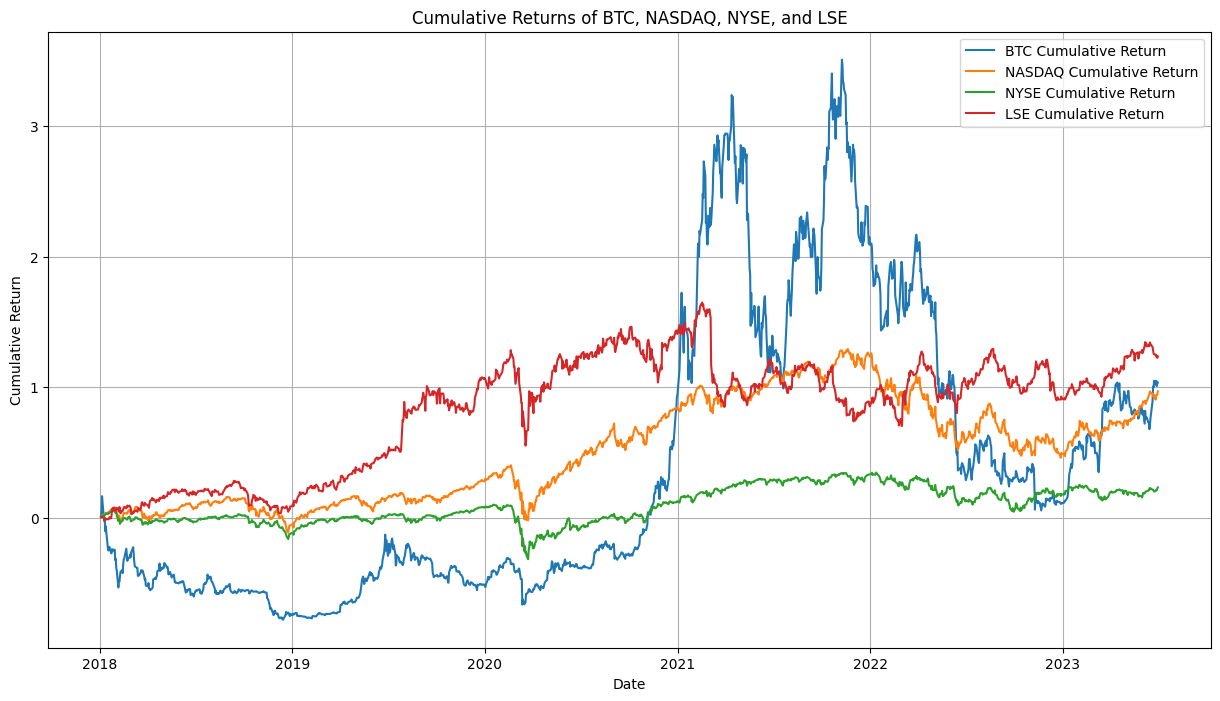

In [ ]:
# Calculate Cumulative Returns
df['BTC_Cumulative_Return'] = (1 + df['BTC_Return']).cumprod() - 1
df['NASDAQ_Cumulative_Return'] = (1 + df['NASDAQ_Return']).cumprod() - 1
df['NYSE_Cumulative_Return'] = (1 + df['NYSE_Return']).cumprod() - 1
df['LSE_Cumulative_Return'] = (1 + df['LSE_Return']).cumprod() - 1

# Plotting Cumulative Returns
plt.figure(figsize=(15, 8))
plt.plot(df['Date'], df['BTC_Cumulative_Return'], label='BTC Cumulative Return')
plt.plot(df['Date'], df['NASDAQ_Cumulative_Return'], label='NASDAQ Cumulative Return')
plt.plot(df['Date'], df['NYSE_Cumulative_Return'], label='NYSE Cumulative Return')
plt.plot(df['Date'], df['LSE_Cumulative_Return'], label='LSE Cumulative Return')
plt.title('Cumulative Returns of BTC, NASDAQ, NYSE, and LSE')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

While daily returns focus on short-term movements, cumulative returns show the overall performance of an investment over time. If daily returns are like individual steps, cumulative return shows how high the staircase goes overall.

The cumulative return analysis highlights clear differences between Bitcoin and major stock indices. Bitcoin achieves the highest overall return but also experiences the most extreme ups and downs, particularly during the 2020-2021 period, followed by sharp declines. In contrast, the NASDAQ demonstrates strong and relatively consistent long-term growth with much lower volatility than Bitcoin. The LSE shows moderate and steady growth, while the NYSE is the most stable but delivers the lowest cumulative return. These results illustrate the classic risk-return trade-off: higher potential returns usually come with higher risk.

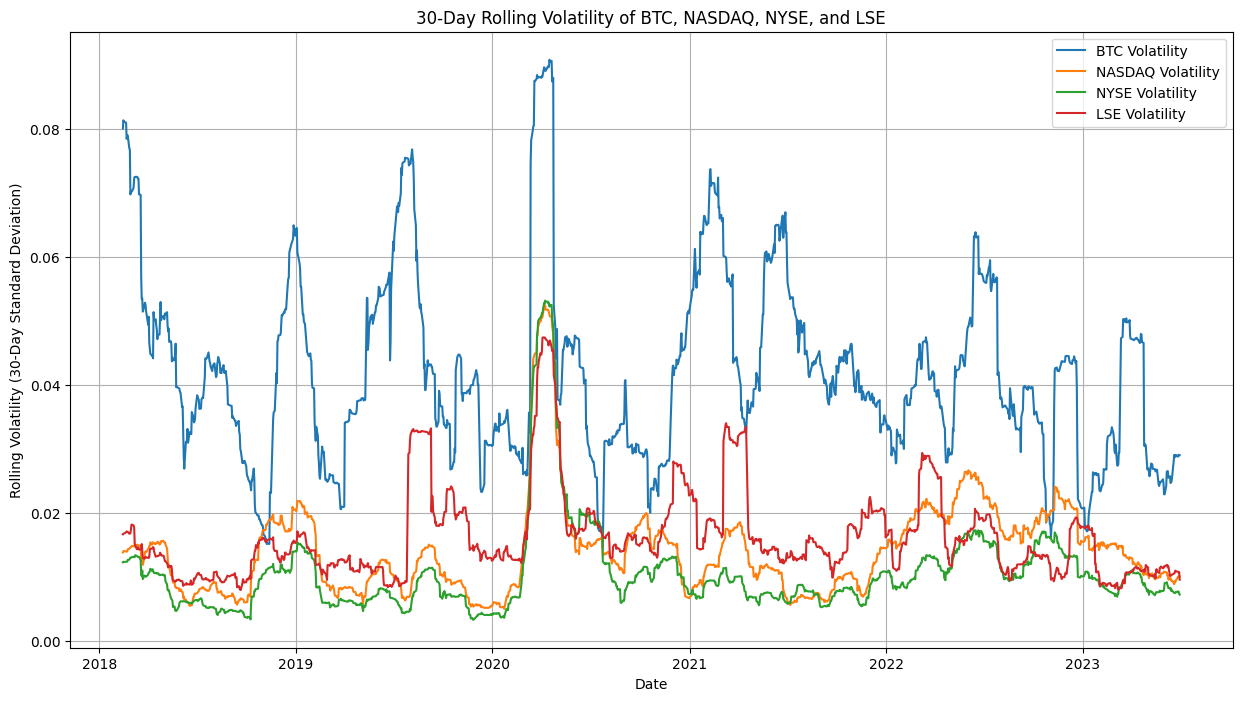

In [ ]:
df['BTC_Volatility'] = df['BTC_Return'].rolling(window=30).std()
df['NASDAQ_Volatility'] = df['NASDAQ_Return'].rolling(window=30).std()
df['NYSE_Volatility'] = df['NYSE_Return'].rolling(window=30).std()
df['LSE_Volatility'] = df['LSE_Return'].rolling(window=30).std()

plt.figure(figsize=(15, 8))
plt.plot(df['Date'], df['BTC_Volatility'], label='BTC Volatility')
plt.plot(df['Date'], df['NASDAQ_Volatility'], label='NASDAQ Volatility')
plt.plot(df['Date'], df['NYSE_Volatility'], label='NYSE Volatility')
plt.plot(df['Date'], df['LSE_Volatility'], label='LSE Volatility')
plt.title('30-Day Rolling Volatility of BTC, NASDAQ, NYSE, and LSE')
plt.xlabel('Date')
plt.ylabel('Rolling Volatility (30-Day Standard Deviation)')
plt.legend()
plt.grid(True)
plt.show()

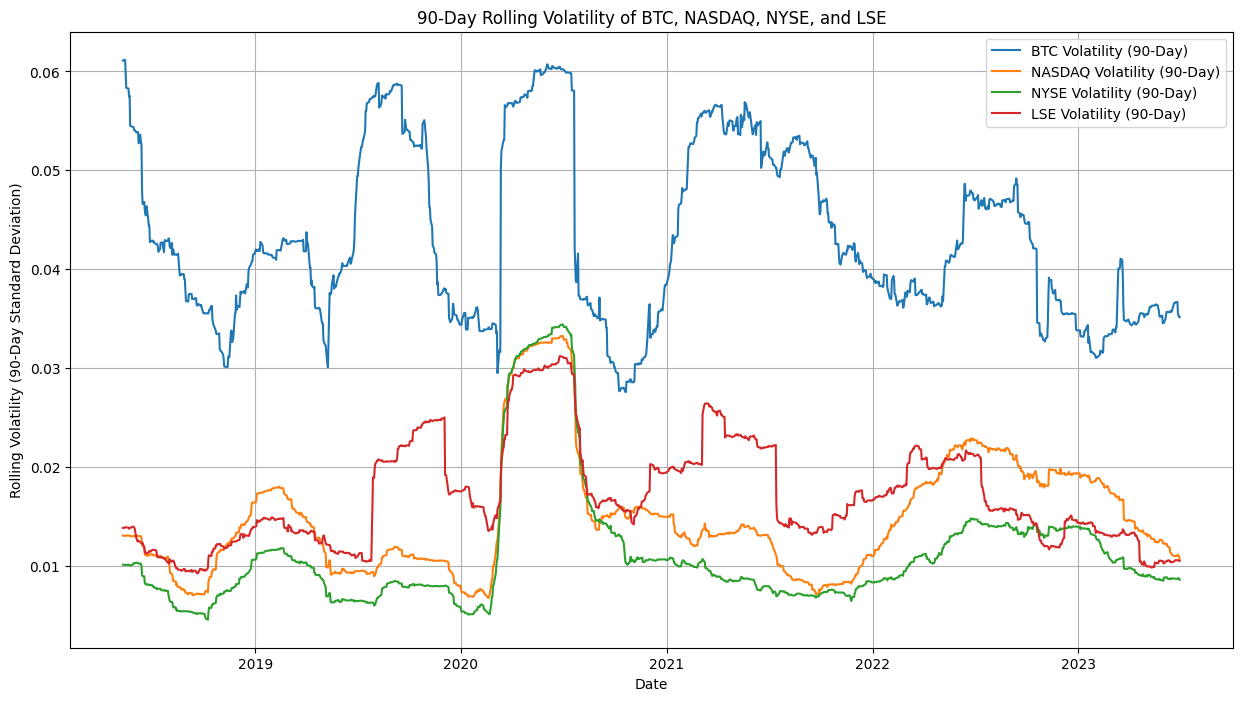

In [ ]:
df['BTC_Volatility_90'] = df['BTC_Return'].rolling(window=90).std()
df['NASDAQ_Volatility_90'] = df['NASDAQ_Return'].rolling(window=90).std()
df['NYSE_Volatility_90'] = df['NYSE_Return'].rolling(window=90).std()
df['LSE_Volatility_90'] = df['LSE_Return'].rolling(window=90).std()

plt.figure(figsize=(15, 8))
plt.plot(df['Date'], df['BTC_Volatility_90'], label='BTC Volatility (90-Day)')
plt.plot(df['Date'], df['NASDAQ_Volatility_90'], label='NASDAQ Volatility (90-Day)')
plt.plot(df['Date'], df['NYSE_Volatility_90'], label='NYSE Volatility (90-Day)')
plt.plot(df['Date'], df['LSE_Volatility_90'], label='LSE Volatility (90-Day)')
plt.title('90-Day Rolling Volatility of BTC, NASDAQ, NYSE, and LSE')
plt.xlabel('Date')
plt.ylabel('Rolling Volatility (90-Day Standard Deviation)')
plt.legend()
plt.grid(True)
plt.show()

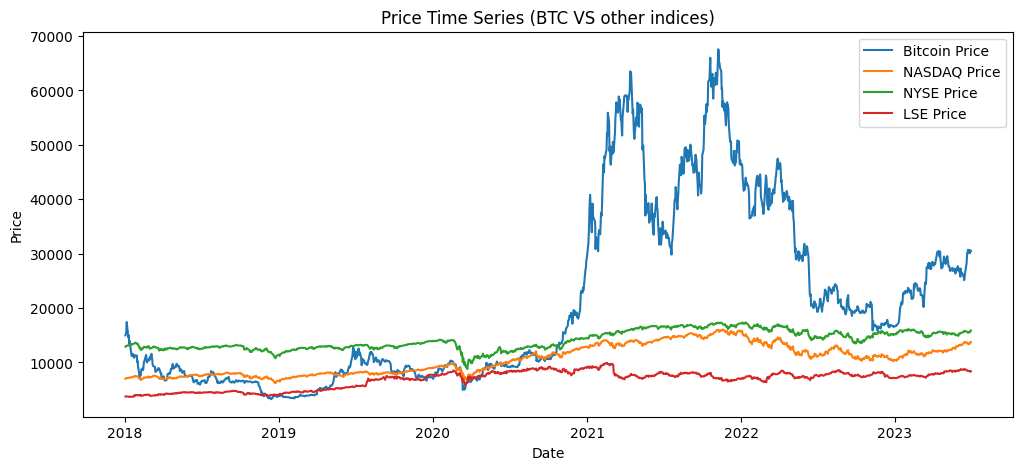

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['BTC'], label="Bitcoin Price")
plt.plot(df['Date'], df['NASDAQ'], label="NASDAQ Price")
plt.plot(df['Date'], df['NYSE'], label="NYSE Price")
plt.plot(df['Date'], df['LSE'], label="LSE Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Price Time Series (BTC VS other indices)")
plt.legend()
plt.show()

Between 2018 and 2019, Bitcoin's price declined. During this period, Bitcoin was still influenced by traditional market forces such as supply and demand. In 2021, Bitcoin experienced a rapid price increase, partly due to increased institutional acceptance. The approval of Bitcoin related exchange traded products made it easier for investors to buy Bitcoin through traditional financial markets, similar to purchasing stocks like Apple or Tesla. This increased accessibility contributed to higher demand and rising prices.(1).

In May 2021, Bitcoin's price dropped sharply. Research suggests that much of the selling came from retail investors rather than large institutions. While some large holders sold early, many began buying again when prices fell. Because the Bitcoin market had grown significantly by this point, even a relatively small wave of selling caused a major price drop. Additional concerns, such as regulatory pressure, China's crypto crackdown, and environmental issues, further increased market uncertainty.



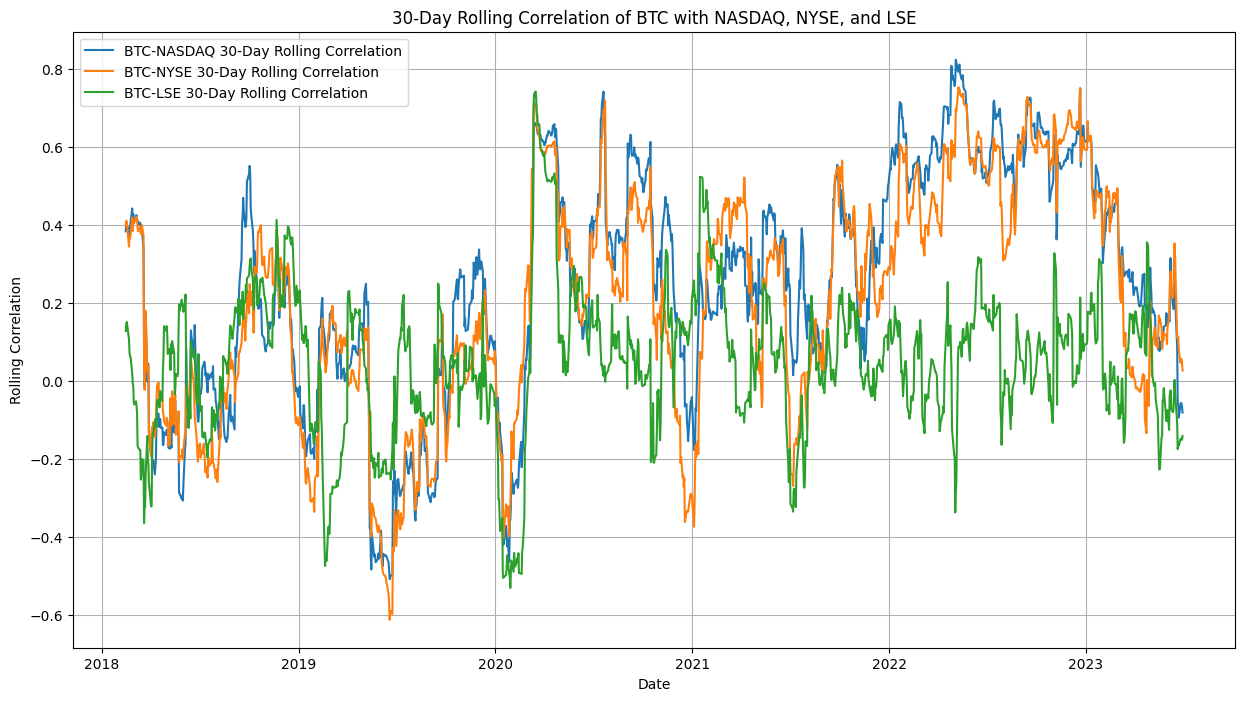

In [ ]:
import matplotlib.pyplot as plt

# Calculate 30-day rolling correlations with BTC
df['BTC_NASDAQ_Corr_30'] = df['BTC_Return'].rolling(window=30).corr(df['NASDAQ_Return'])
df['BTC_NYSE_Corr_30'] = df['BTC_Return'].rolling(window=30).corr(df['NYSE_Return'])
df['BTC_LSE_Corr_30'] = df['BTC_Return'].rolling(window=30).corr(df['LSE_Return'])

# Plotting 30-day rolling correlations
plt.figure(figsize=(15, 8))
plt.plot(df['Date'], df['BTC_NASDAQ_Corr_30'], label='BTC-NASDAQ 30-Day Rolling Correlation')
plt.plot(df['Date'], df['BTC_NYSE_Corr_30'], label='BTC-NYSE 30-Day Rolling Correlation')
plt.plot(df['Date'], df['BTC_LSE_Corr_30'], label='BTC-LSE 30-Day Rolling Correlation')
plt.title('30-Day Rolling Correlation of BTC with NASDAQ, NYSE, and LSE')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.grid(True)
plt.show()

The analysis also examines the relationship between trading volume and volatility. A correlation value of around 0.2 indicates a weak positive relationship, meaning that higher trading activity is slightly associated with greater price volatility, but the relationship is not strong or consistent.

Trading volume refers to the amount of an asset traded within a given period of time, such as the number of Bitcoins bought or sold in a single day. High trading volume generally indicates strong market interest and active participation from investors.

Volatility measures how much an asset’s price fluctuates over time. It reflects the degree of price instability or risk associated with the asset. High volatility means prices can change rapidly, leading to higher potential returns but also greater risk, while low volatility indicates more stable and predictable price movements.

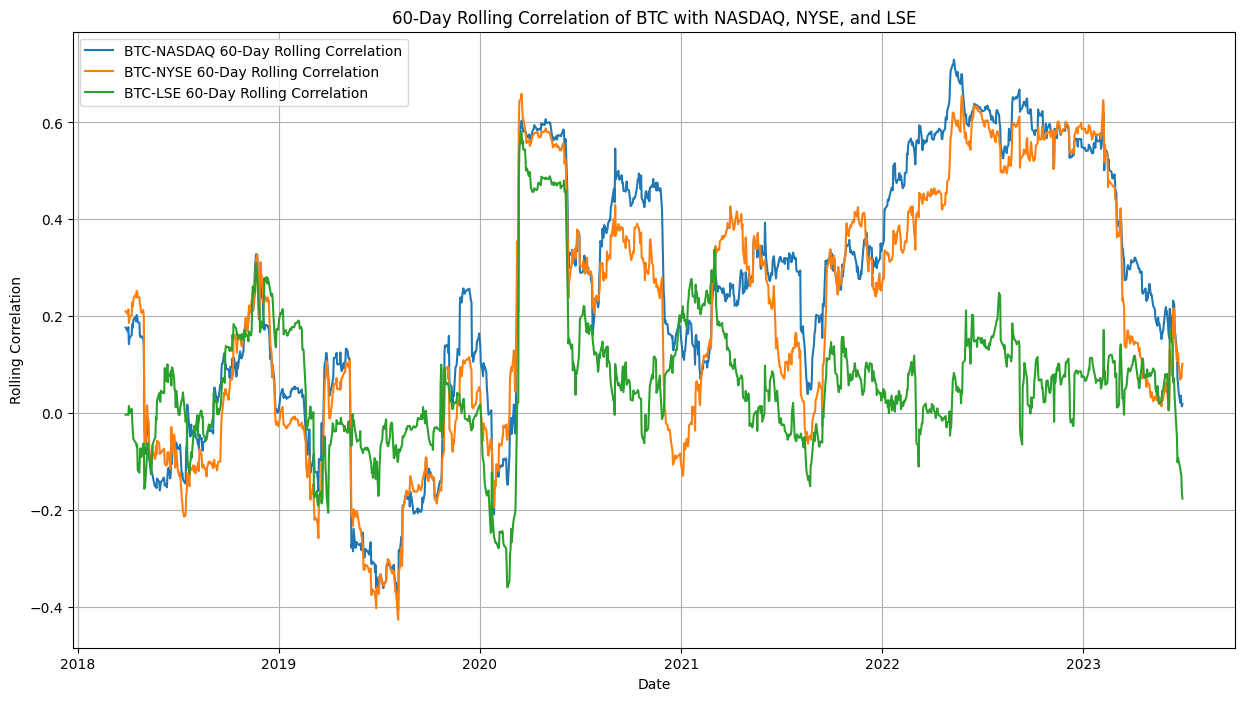

In [ ]:
import matplotlib.pyplot as plt

# Calculate 60-day rolling correlations with BTC
df['BTC_NASDAQ_Corr_60'] = df['BTC_Return'].rolling(window=60).corr(df['NASDAQ_Return'])
df['BTC_NYSE_Corr_60'] = df['BTC_Return'].rolling(window=60).corr(df['NYSE_Return'])
df['BTC_LSE_Corr_60'] = df['BTC_Return'].rolling(window=60).corr(df['LSE_Return'])

# Plotting 60-day rolling correlations
plt.figure(figsize=(15, 8))
plt.plot(df['Date'], df['BTC_NASDAQ_Corr_60'], label='BTC-NASDAQ 60-Day Rolling Correlation')
plt.plot(df['Date'], df['BTC_NYSE_Corr_60'], label='BTC-NYSE 60-Day Rolling Correlation')
plt.plot(df['Date'], df['BTC_LSE_Corr_60'], label='BTC-LSE 60-Day Rolling Correlation')
plt.title('60-Day Rolling Correlation of BTC with NASDAQ, NYSE, and LSE')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.grid(True)
plt.show()

**Correlation**

Correlation measures how closely two variables move together. Values close to +1 indicate strong positive movement, values near -1 indicate opposite movement, and values close to 0 suggest little relationship. Rolling correlation uses a moving time window (60 days in this case) to observe how relationships change over time.

**Rolling**:

Before 2020, Bitcoin's correlation with stock markets was often close to zero or negative, suggesting it moved independently and offered diversification benefits. During the COVID-19 period, correlations increased sharply, indicating that Bitcoin and stock markets began moving together. After 2021, Bitcoin's correlation with the NASDAQ remained relatively high, suggesting that Bitcoin behaved more like a technology stock, rising during periods of investor confidence and falling during market fear. In contrast, Bitcoin's relationship with the LSE remained weaker and more unstable.

Finally, the risk-return comparison shows that Bitcoin offers the highest potential returns but also carries the greatest risk. The NASDAQ provides a more balanced trade-off between risk and return, consistent with its tech-focused nature. The LSE delivers slightly higher returns for a similar level of risk compared to the NASDAQ, while the NYSE remains the most stable but offers lower returns. This comparison highlights how different assets suit different investor risk preferences.


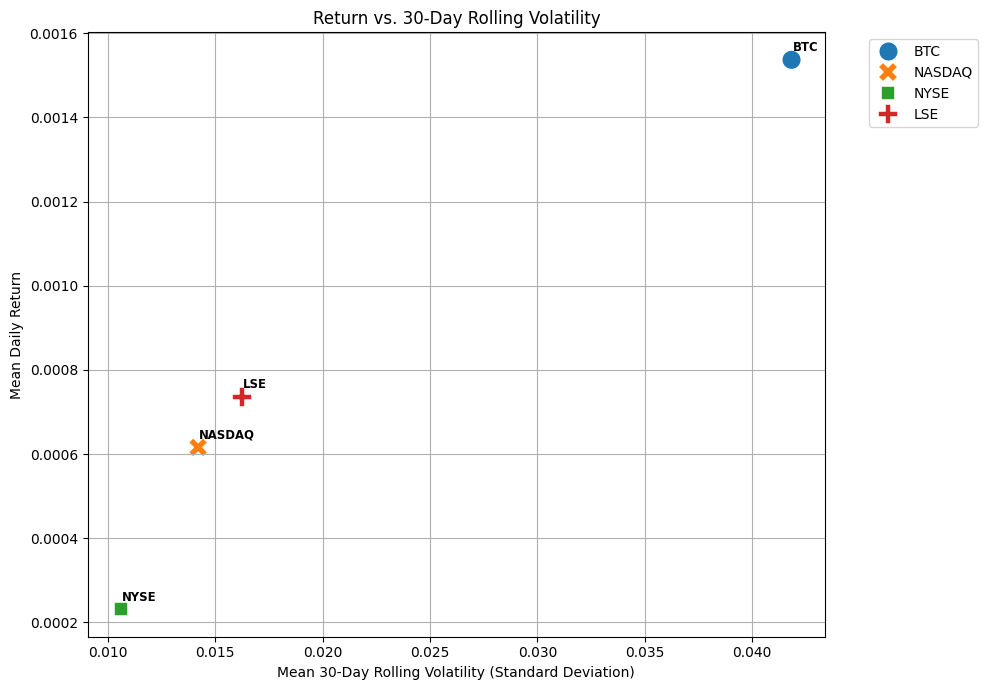

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean returns and mean 30-day rolling volatilities
mean_returns = {
    'BTC': df['BTC_Return'].mean(),
    'NASDAQ': df['NASDAQ_Return'].mean(),
    'NYSE': df['NYSE_Return'].mean(),
    'LSE': df['LSE_Return'].mean()
}

mean_volatilities = {
    'BTC': df['BTC_Volatility'].mean(),
    'NASDAQ': df['NASDAQ_Volatility'].mean(),
    'NYSE': df['NYSE_Volatility'].mean(),
    'LSE': df['LSE_Volatility'].mean()
}

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Asset': list(mean_returns.keys()),
    'Mean Return': list(mean_returns.values()),
    'Mean Volatility': list(mean_volatilities.values())
})

# Create the scatterplot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=plot_df, x='Mean Volatility', y='Mean Return', hue='Asset', s=200, style='Asset')

# Add labels to the points
for i, row in plot_df.iterrows():
    plt.text(row['Mean Volatility'] + 0.00005, row['Mean Return'] + 0.00002, row['Asset'], horizontalalignment='left', size='small', color='black', weight='semibold')

plt.title('Return vs. 30-Day Rolling Volatility')
plt.xlabel('Mean 30-Day Rolling Volatility (Standard Deviation)')
plt.ylabel('Mean Daily Return')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This plot compares the mean daily returns (y-axis) with the mean 30-day rolling volatility (x-axis) for Bitcoin (BTC), NASDAQ, NYSE, and LSE. In simple terms, it illustrates how much return each asset generates relative to the level of risk it carries.

**Bitcoin** offers the highest potential return but also involves the greatest risk. It appears far to the right and high on the plot, reflecting its extreme price volatility alongside strong growth potential.

The **NASDAQ** shows a more balanced risk-return profile, which is consistent with its focus on technology-driven growth stocks. It delivers relatively strong returns while maintaining a moderate level of risk.

The **LSE** provides slightly higher returns at a similar level of risk compared to the NASDAQ, suggesting that it may be a relatively efficient option among traditional stock indices.

In contrast, the **NYSE** is positioned as the most stable and least risky asset in the comparison. However, this lower risk is associated with lower average returns, making it more suitable for risk-averse investors.

**Conclusion**

This project analyzed the performance and risk characteristics of Bitcoin in comparison with major stock market indices, including the NASDAQ, NYSE, and LSE, over the period from 2018 to 2024. By examining daily returns, volatility, cumulative returns, trading volume, and rolling correlations, the study aimed to understand whether Bitcoin behaves as a diversification asset or more like a traditional risk-on investment.

The results show that Bitcoin offers the highest potential returns but also exhibits significantly higher volatility and tail risk than traditional stock indices. While this creates opportunities for large gains, it also exposes investors to substantial price fluctuations and increased uncertainty. In contrast, the NASDAQ demonstrates strong and relatively consistent growth with a more balanced risk-return profile, while the NYSE remains the most stable but delivers lower overall returns. The LSE sits between these indices, providing moderate returns with moderate risk.

Correlation analysis reveals that Bitcoin's relationship with stock markets has changed over time. Prior to 2020, Bitcoin showed low or even negative correlations with traditional indices, suggesting potential diversification benefits. However, during and after the COVID-19 period, Bitcoin became more closely correlated with the NASDAQ, indicating that it increasingly behaves like a technology-driven risk asset rather than an independent alternative investment.

Overall, the findings suggest that Bitcoin is better suited as a high-risk, high-return asset rather than a reliable hedge against traditional markets. While it may still provide diversification benefits in certain periods, its growing alignment with equity markets reduces its effectiveness as a standalone risk-reducing investment. Investors should therefore consider Bitcoin as part of a broader portfolio strategy, balancing its potential rewards against its high volatility and evolving market behavior.
